# Violent Crime Rates By US State

## Data Description
__Violent Crime Rates by US State:__ This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in Urban areas. This is a systematic approach for identifying and analyzing patterns and trend in crime using US Arrest dataset.

## What is Hierarchical Clustering?
Hierarchical clustering is atype of unservised machine learning algorithm used to cluster unlabled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. One of the major considerations in using the K-Means algorithm is deciding the value of K beforehand. The hierarchical clustering algorithm does not have this restriction. The ouput of the hierarchical algorithm is quite different from the K-means algorithm as well. It results in an inverted tree-sgaped structure, called the __dendrogram.__

### Types of Hierarchical Clustering:

There are two types of hierarchical clustering:

- __Agglomerative__: The data points are clustered using a bottom-up approach starting with individual data points.
- __Divisive__: The top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

## Steps to Perform Hierarchical Clustering:

Following are the steps involved in __agglomerative clustering__:

- At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K while K is an integer represnting the number of data points.
- Form a cluster by joining the two closest data point resulting in K-1 clusters.
- Form more clusters by joining the two closest clusters resulting in K-2 clusters.
- Repeat the above three steps untill one big cluster is formed.
- Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem.

### Import the Desired Libraries:

In [55]:
# ignoring any warnings
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### Reading and Understanding the Data

In [5]:
crime = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/US_violent_crime.csv")

In [7]:
# Peeking at the dataset
crime.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#### Our dataset consists of crime rates for Murder, Assault, UrbanPop and rape

In [10]:
# Let's see how many rows and columns we got!
crime.shape

(50, 5)

In [12]:
# let's see some facts about our data
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


#### We have 50 rows and 5 columns.

In [15]:
# let's get some statistics summary
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


#### Let's check for missing values.

In [18]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

#### We have no missing values!

In [21]:
# Renaming the column (Unnamed) to State
crime = crime.rename(columns={"Unnamed: 0": "State"})

In [23]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Exploratory Data Analysis

### 1) Murder Rate

In [29]:
crime.groupby("State")["Murder"].max().sort_values(ascending=False)

State
Georgia           17.4
Mississippi       16.1
Florida           15.4
Louisiana         15.4
South Carolina    14.4
Alabama           13.2
Tennessee         13.2
North Carolina    13.0
Texas             12.7
Nevada            12.2
Michigan          12.1
New Mexico        11.4
Maryland          11.3
New York          11.1
Illinois          10.4
Alaska            10.0
Kentucky           9.7
California         9.0
Missouri           9.0
Arkansas           8.8
Virginia           8.5
Arizona            8.1
Colorado           7.9
New Jersey         7.4
Ohio               7.3
Indiana            7.2
Wyoming            6.8
Oklahoma           6.6
Pennsylvania       6.3
Montana            6.0
Kansas             6.0
Delaware           5.9
West Virginia      5.7
Hawaii             5.3
Oregon             4.9
Massachusetts      4.4
Nebraska           4.3
Washington         4.0
South Dakota       3.8
Rhode Island       3.4
Connecticut        3.3
Utah               3.2
Minnesota          2.7
Idaho

<Axes: xlabel='State'>

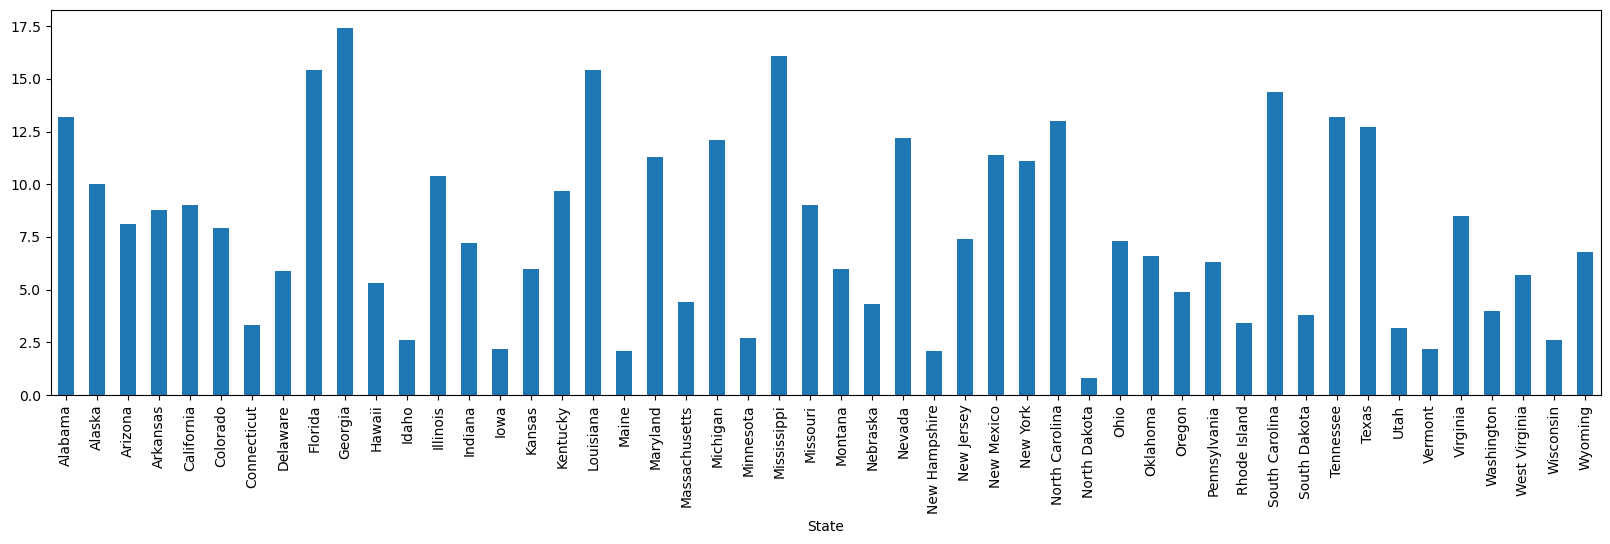

In [31]:
plt.figure(figsize=(20,5))
crime.groupby("State")["Murder"].max().plot(kind="bar")

### Observations:
- Highest Murder Rate: Georgia and Missisipi
- Lowest Murder Rate: Idaho, Iowa, Maine, New Hampshire, North dakota, Vermont and Wisconsin.

### 2) Assault Rate

In [35]:
crime.groupby("State")["Assault"].max().sort_values(ascending= False)

State
North Carolina    337
Florida           335
Maryland          300
Arizona           294
New Mexico        285
South Carolina    279
California        276
Alaska            263
Mississippi       259
Michigan          255
New York          254
Nevada            252
Louisiana         249
Illinois          249
Delaware          238
Alabama           236
Georgia           211
Colorado          204
Texas             201
Arkansas          190
Tennessee         188
Missouri          178
Rhode Island      174
Wyoming           161
New Jersey        159
Oregon            159
Virginia          156
Oklahoma          151
Massachusetts     149
Washington        145
Utah              120
Idaho             120
Ohio              120
Kansas            115
Indiana           113
Connecticut       110
Montana           109
Kentucky          109
Pennsylvania      106
Nebraska          102
South Dakota       86
Maine              83
West Virginia      81
Minnesota          72
New Hampshire      57
Iowa

<Axes: xlabel='State'>

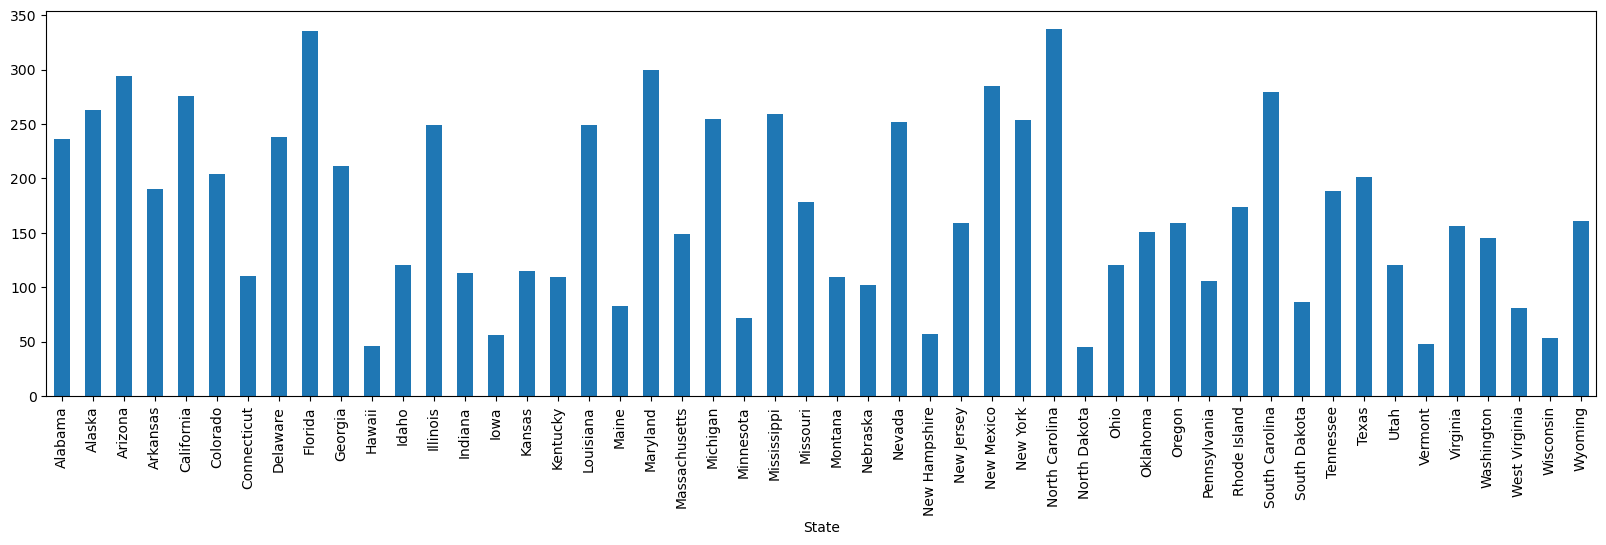

In [37]:
plt.figure(figsize=(20, 5))
crime.groupby("State")["Assault"].max().plot(kind="bar")

#### Observations:

- Highest Assualt Rate: Floride and North California.
- Lowest Assualt Rate: Hawaii, North Dakota, Vermont, New Hampshire and Wisconsin.

### 3) Rape Rate

<Axes: xlabel='State'>

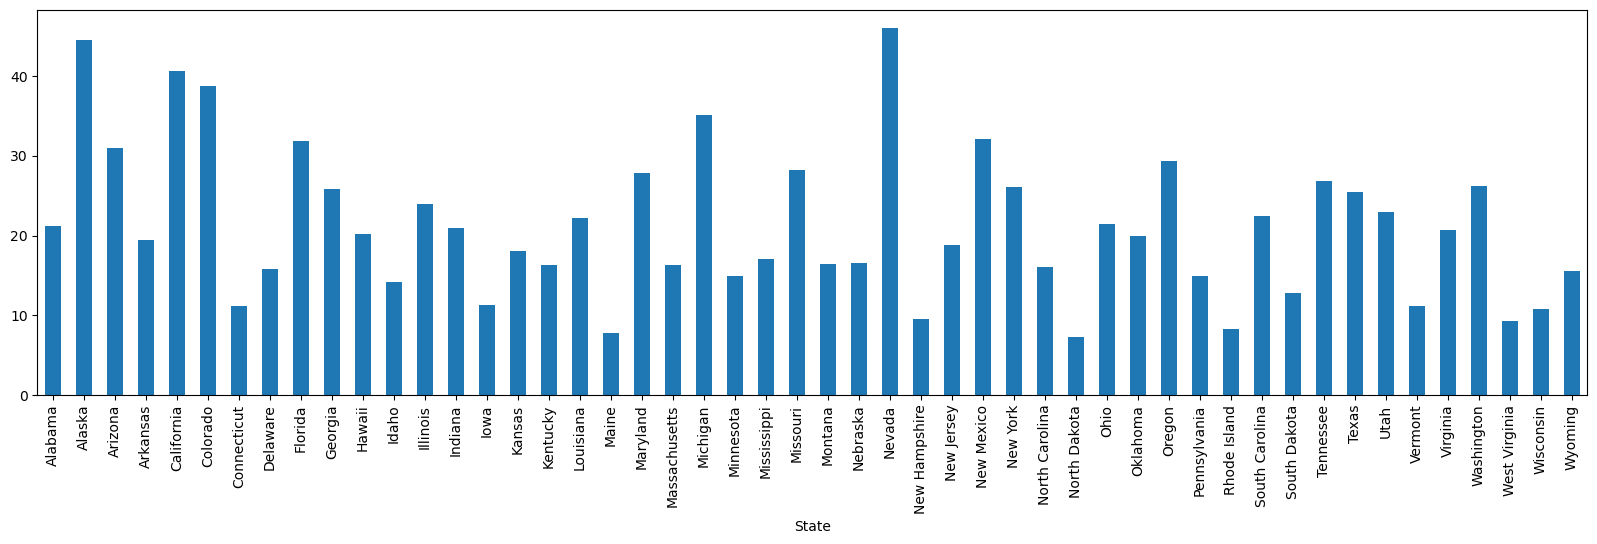

In [41]:
plt.figure(figsize=(20, 5))
crime.groupby("State")["Rape"].max().plot(kind="bar")

### Observations:

- Highest UrbanPop Rate: Nevada andd Alaska.
- Lowest UrbanPop Rate: Maine, North Dakota, Vermont,Connecticut, New Hampshire, Wisconsin, Rhoda Island and West Virginia

### UrbanPop: Percent Urban Population

<Axes: xlabel='State'>

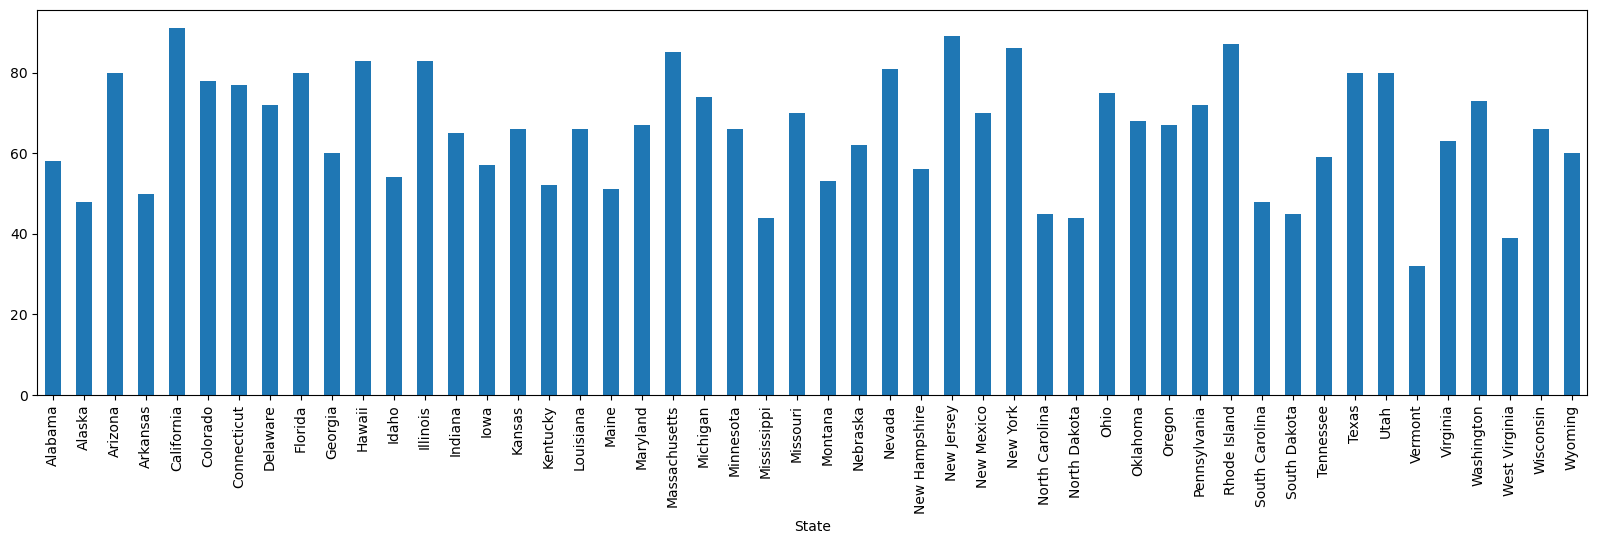

In [45]:
plt.figure(figsize=(20, 5))
crime.groupby("State")["UrbanPop"].max().plot(kind="bar")

In [68]:
data = crime.iloc[:, 1:].values
#to drop the state column, you can also use the drop method to drop the statecolumn

In [70]:
scaled_data = scaler.fit_transform(data)

## Types of Linkages:

#### 1) Single Linkage:
The distance between 2 clusters is defined as the shortest distance between points in the two clusters.

Text(0, 0.5, 'Euclidean distances')

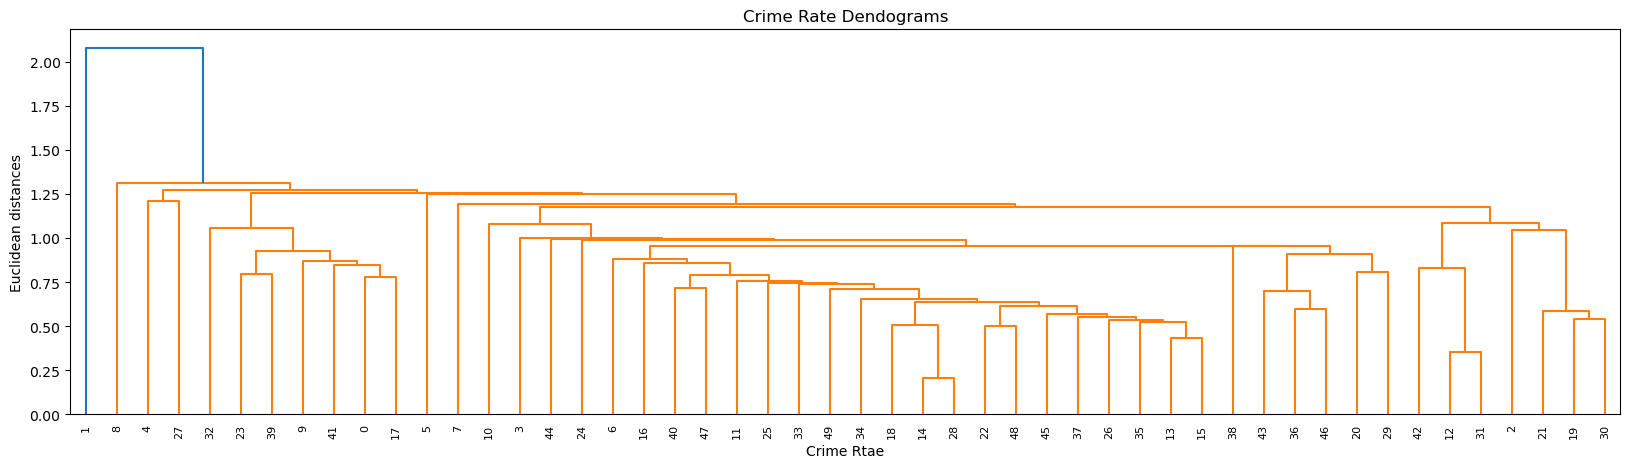

In [86]:
plt.figure(figsize=(20, 5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method="single"))
plt.xlabel("Crime Rtae")
plt.ylabel("Euclidean distances")

The hierarchy class has s dendrogram method which takes the values returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters.

### 2) Complete Linkage:
The distance between 2 clusters is defined as the maximum distance between any 2 point in the clusters

Text(0, 0.5, 'Euclidean distances')

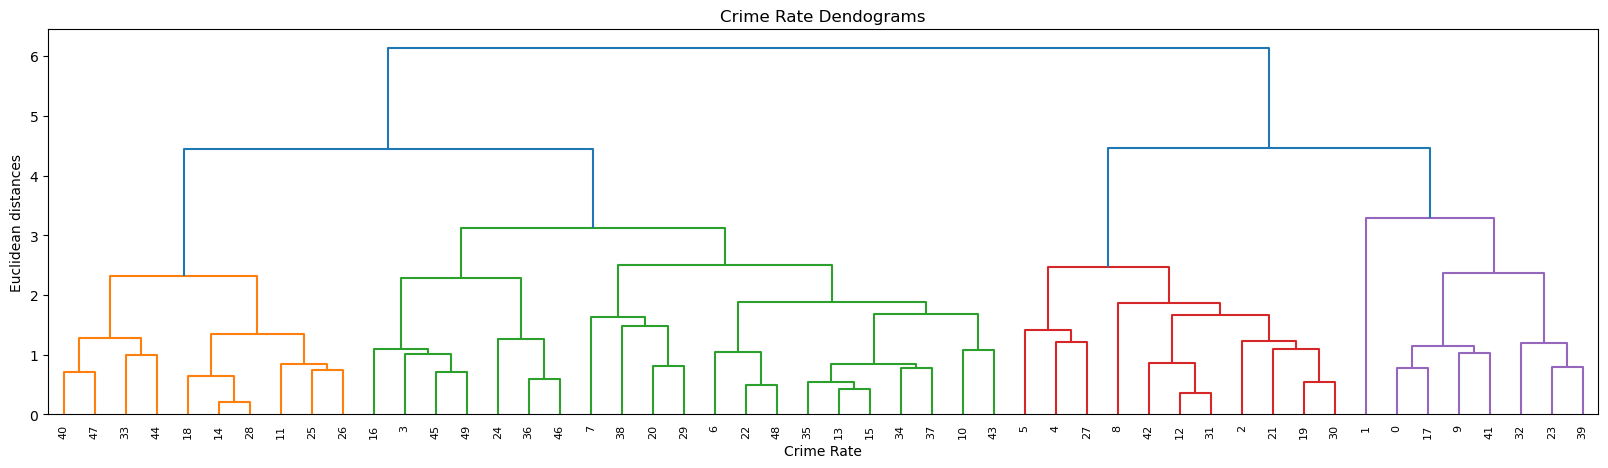

In [89]:
plt.figure(figsize=(20, 5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method="complete"))
plt.xlabel("Crime Rate")
plt.ylabel("Euclidean distances")

### 3) Average Linkage:
The distance between 2 cluster is defined as the average distance between every of one cluster to every other point of the other cluster.

Text(0, 0.5, 'Eulidean distances')

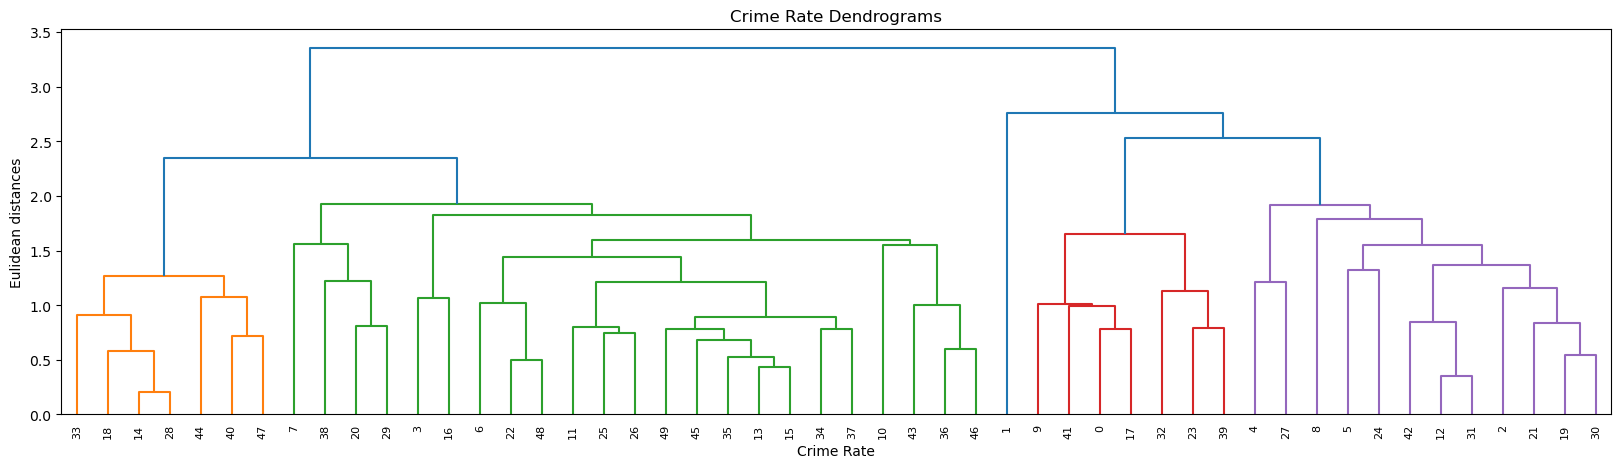

In [92]:
plt.figure(figsize=(20, 5))
plt.title("Crime Rate Dendrograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method="average"))
plt.xlabel("Crime Rate")
plt.ylabel("Eulidean distances")

The single linkage type will produce dendrograms which are not structured properly, whereas complete or average linkage will produce clusters which have a proper tree-like structure.

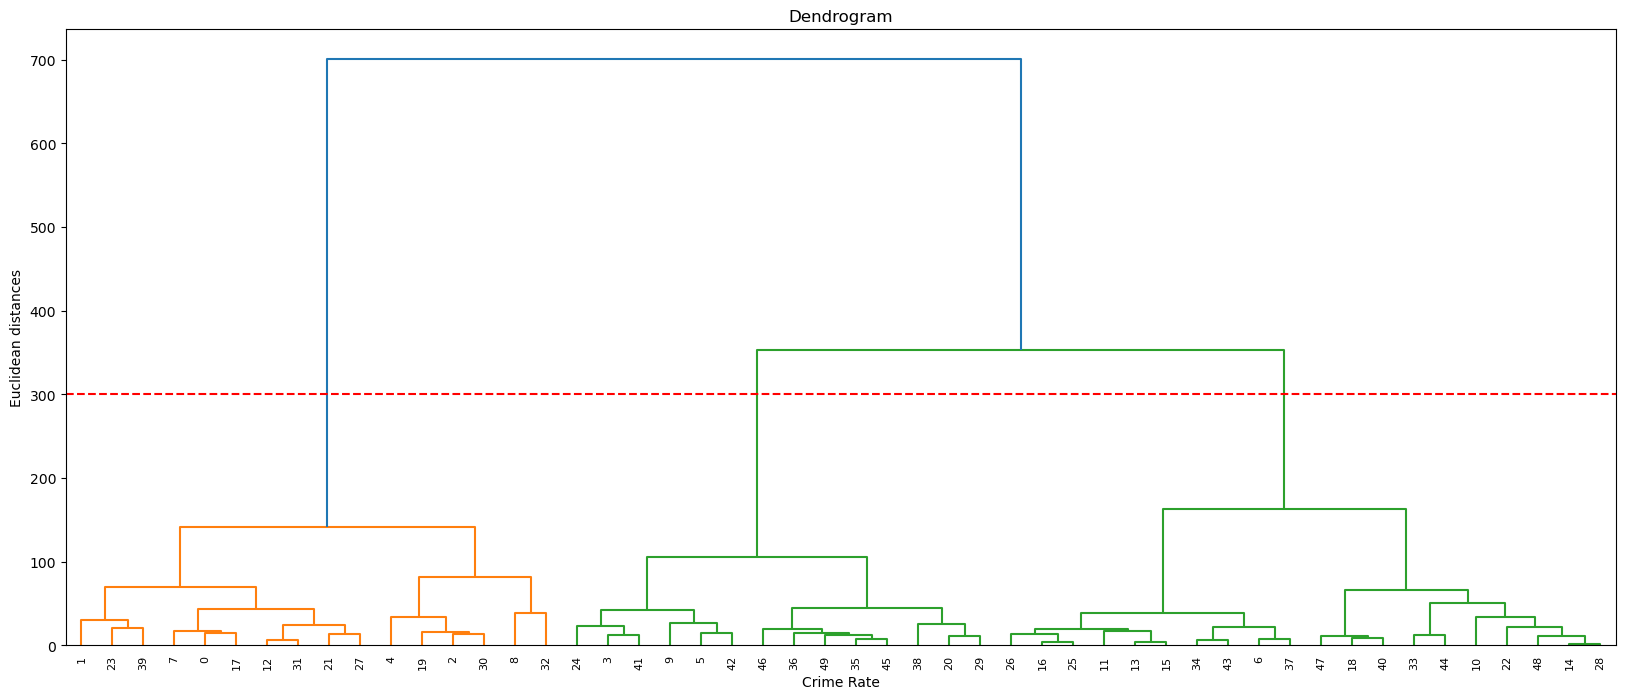

In [102]:
# with ward method
plt.figure(figsize=(20, 8))
dendrogram = sch.dendrogram(sch.linkage(data, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Crime Rate")
plt.ylabel("Euclidean distances")
plt.axhline(y=300,color='r', linestyle='--')
plt.show()

### How do we determine the optimal number of clusters from this diagram?

We look for the largest distance that we can see vertically without crossing any horizontal line and this is the red framed line on the above diagram. Let's count the number of lines on the diagram and determines the oprtimal number of clusters. Cluster number will be 3 for this dataset.

In [107]:
# Fit the Agglomerative Clustering

AC = AgglomerativeClustering(n_clusters= 3, metric="euclidean", linkage="ward")

### Ward method

It is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it's almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

In [110]:
# Fit and predict to have the clujster labels.
y_pred = AC.fit_predict(data)
y_pred

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [112]:
# Fetch the cluster labels
crime["cluster labels"] = y_pred

In [114]:
# Let's see which State falls in which cluster
crime[["State", "cluster labels"]]

,State,cluster labels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


<Axes: xlabel='cluster labels', ylabel='Murder'>

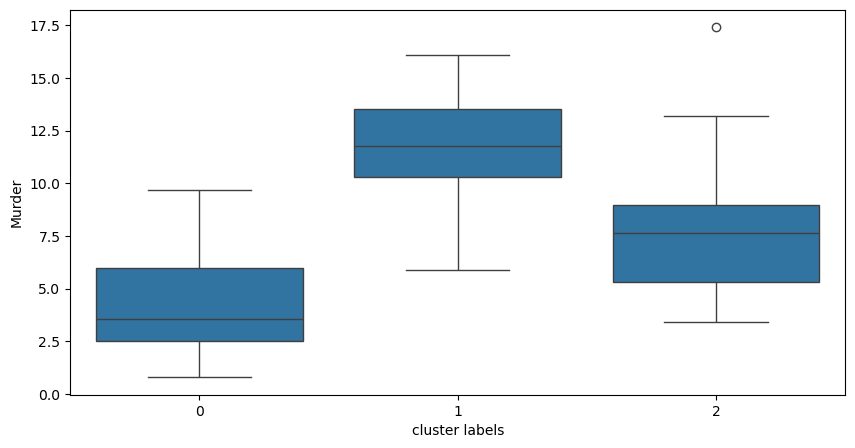

In [125]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="cluster labels", y="Murder", data=crime)

<Axes: xlabel='cluster labels', ylabel='Rape'>

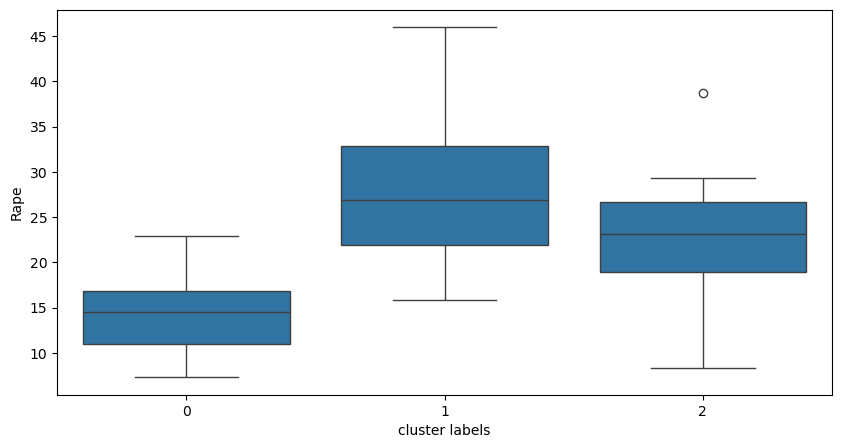

In [127]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="cluster labels", y="Rape", data=crime)

<Axes: xlabel='cluster labels', ylabel='Assault'>

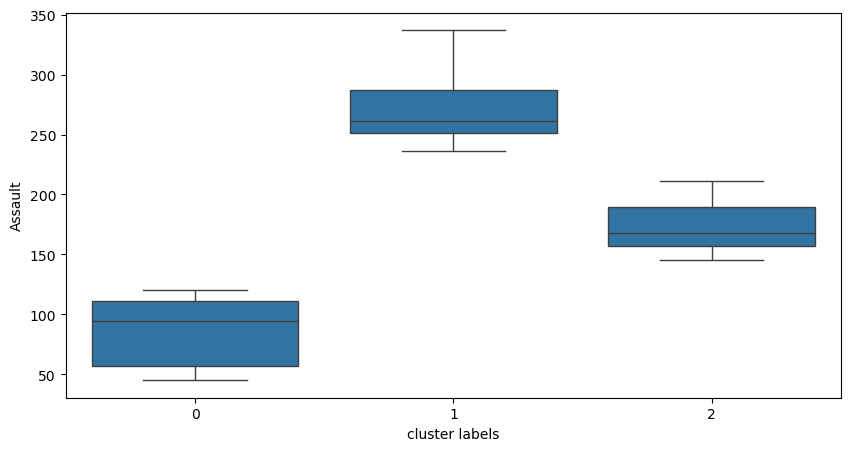

In [129]:
plt.figure(figsize=(10,5))
sns.boxplot(x="cluster labels", y="Assault", data=crime)

## Observations:

- The Cvities in the Cluster-0 seems to be Safe-Zone where there are relatively less relatively less Murders, Assaults an d Rapes.
- The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.
- Tghe Cities in Cluster-3 seems to have moderate crime rates when compared to other zones and can called as Moderate-Zone


Let's display the cities in each zone now!

In [123]:
safe_zone = crime.groupby("cluster labels")["State"].unique()[0]
safe_zone

array(['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania',
       'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin'],
      dtype=object)

In [41]:
Danger_Zone = crime.groupby("cluster labels")["State"].unique()[1]
Danger_Zone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware',
       'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan',
       'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina'], dtype=object)

In [43]:
moderate_Zone = crime.groupby("cluster labels")["State"].unique()[2]
moderate_Zone

array(['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri',
       'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee',
       'Texas', 'Virginia', 'Washington', 'Wyoming'], dtype=object)

## Creating a scatter plot based on tghe danger level clusters of the cities

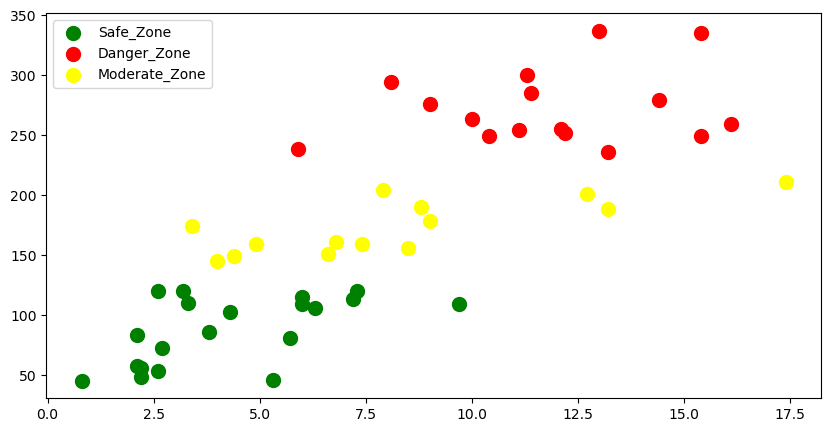

In [132]:
plt.figure(figsize=(10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='green', label ='Safe_Zone')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='red', label ='Danger_Zone')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=100, c='yellow', label ='Moderate_Zone')
plt.legend()
plt.show()